In [52]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('covid19_lockdown_comments.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
database

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl
0,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Skooter_McGaven,I wish we had an understanding of where the ma...,1
1,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Richandler,> Is it overly family spread?\n\nI believe the...,0
2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,This sounds horrible and I hate myself a littl...,0
3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,My husband and I are not yet confirmed to have...,0
4,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,ZombiGrn,In my neighborhood people started throwing par...,0
...,...,...,...,...,...,...,...,...,...,...,...
455,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,stillobsessed,A surprise lockdown period of 30 days wouldn't...,0
456,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,thisrockismyboone,Society would cease to function without infras...,0
457,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,SamH123,\- this depends a bit on what stage of spread ...,0
458,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,reini_urban,Strict physical distance may be statistically ...,1


In [54]:
print(database['comment'].isna().sum())

0


In [55]:
df2 = database['comment'].fillna('')
database['comment'] = df2

In [56]:
print(database['comment'].isna().sum())

0


In [57]:
#Identify Language

In [58]:
!pip install spacy


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 14.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
!pip install spacy_fastlang


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import spacy
import spacy_fastlang

import itertools

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("language_detector")

language = []

for i in zip(database['comment']):
        language.append(nlp(str(i))._.language)
        
database['language'] = language

In [62]:
database

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,language
0,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Skooter_McGaven,I wish we had an understanding of where the ma...,1,en
1,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,Richandler,> Is it overly family spread?\n\nI believe the...,0,en
2,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,NaN,This sounds horrible and I hate myself a littl...,0,en
3,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,lcbk,My husband and I are not yet confirmed to have...,0,en
4,0,g1hpwu,Johari82,Ending coronavirus lockdowns will be a dangero...,6967,1484,1.586912e+09,2020-04-15 08:46:34,ZombiGrn,In my neighborhood people started throwing par...,0,en
...,...,...,...,...,...,...,...,...,...,...,...,...
455,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,stillobsessed,A surprise lockdown period of 30 days wouldn't...,0,en
456,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,thisrockismyboone,Society would cease to function without infras...,0,en
457,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,SamH123,\- this depends a bit on what stage of spread ...,0,en
458,0,gr29as,frequenttimetraveler,Strict Physical Distancing May Be More Efficie...,909,352,1.590517e+09,2020-05-27 02:10:44,reini_urban,Strict physical distance may be statistically ...,1,en


In [63]:
df = database[database['language'] == 'en']

In [64]:
df.iloc[0]

Unnamed: 0                                                    0
id                                                       g1hpwu
author                                                 Johari82
title         Ending coronavirus lockdowns will be a dangero...
score                                                      6967
comms_num                                                  1484
created                                            1586911594.0
timestamp                                   2020-04-15 08:46:34
commenter                                       Skooter_McGaven
comment       I wish we had an understanding of where the ma...
top_lvl                                                       1
language                                                     en
Name: 0, dtype: object

In [65]:
#preprocess

In [66]:
preprocess_review = pd.DataFrame(data=df['comment'])

In [67]:
preprocess_review

,comment
0,I wish we had an understanding of where the ma...
1,> Is it overly family spread?\n\nI believe the...
2,This sounds horrible and I hate myself a littl...
3,My husband and I are not yet confirmed to have...
4,In my neighborhood people started throwing par...
...,...
455,A surprise lockdown period of 30 days wouldn't...
456,Society would cease to function without infras...
457,\- this depends a bit on what stage of spread ...
458,Strict physical distance may be statistically ...


In [68]:
# lower
overall_reviews_lower = []

for i in preprocess_review['comment']:
    overall_reviews_lower.append(i.lower())

preprocess_review['comment_lower'] = overall_reviews_lower

In [69]:
preprocess_review

,comment,comment_lower
0,I wish we had an understanding of where the ma...,i wish we had an understanding of where the ma...
1,> Is it overly family spread?\n\nI believe the...,> is it overly family spread?\n\ni believe the...
2,This sounds horrible and I hate myself a littl...,this sounds horrible and i hate myself a littl...
3,My husband and I are not yet confirmed to have...,my husband and i are not yet confirmed to have...
4,In my neighborhood people started throwing par...,in my neighborhood people started throwing par...
...,...,...
455,A surprise lockdown period of 30 days wouldn't...,a surprise lockdown period of 30 days wouldn't...
456,Society would cease to function without infras...,society would cease to function without infras...
457,\- this depends a bit on what stage of spread ...,\- this depends a bit on what stage of spread ...
458,Strict physical distance may be statistically ...,strict physical distance may be statistically ...


In [70]:
# remove punctuations

punctuations = '''()[]{};:'"\,<>./?@#$%^&*_~-'''

def remove_punct(text):
    no_punct = ""
    for char in text:
        if char not in punctuations:
            no_punct += char
        else:
            no_punct += " "
    
    return re.sub(' +', ' ',no_punct)

overall_reviews_remove_punct = []


for i in overall_reviews_lower:
    overall_reviews_remove_punct.append(remove_punct(i))
    
preprocess_review['comment_remove_punct'] = overall_reviews_remove_punct

In [71]:
preprocess_review

,comment,comment_lower,comment_remove_punct
0,I wish we had an understanding of where the ma...,i wish we had an understanding of where the ma...,i wish we had an understanding of where the ma...
1,> Is it overly family spread?\n\nI believe the...,> is it overly family spread?\n\ni believe the...,is it overly family spread \n\ni believe the ...
2,This sounds horrible and I hate myself a littl...,this sounds horrible and i hate myself a littl...,this sounds horrible and i hate myself a littl...
3,My husband and I are not yet confirmed to have...,my husband and i are not yet confirmed to have...,my husband and i are not yet confirmed to have...
4,In my neighborhood people started throwing par...,in my neighborhood people started throwing par...,in my neighborhood people started throwing par...
...,...,...,...
455,A surprise lockdown period of 30 days wouldn't...,a surprise lockdown period of 30 days wouldn't...,a surprise lockdown period of 30 days wouldn t...
456,Society would cease to function without infras...,society would cease to function without infras...,society would cease to function without infras...
457,\- this depends a bit on what stage of spread ...,\- this depends a bit on what stage of spread ...,this depends a bit on what stage of spread we...
458,Strict physical distance may be statistically ...,strict physical distance may be statistically ...,strict physical distance may be statistically ...


In [72]:
# remove stopwords
import gensim

all_stopwords = gensim.parsing.preprocessing.STOPWORDS

additional_stop_words = ['company']

all_stopwords = all_stopwords.union(set(additional_stop_words))

def remove_mystopwords(sentence):
    tokens = sentence.split(" ")
    tokens_filtered= [word for word in tokens if not word in all_stopwords]
    clean = (" ").join(tokens_filtered)
    return clean

overall_reviews_clean = []

for i in overall_reviews_remove_punct:
    overall_reviews_clean.append(remove_mystopwords(i))

preprocess_review['comment_clean'] = overall_reviews_clean

In [73]:
preprocess_review

,comment,comment_lower,comment_remove_punct,comment_clean
0,I wish we had an understanding of where the ma...,i wish we had an understanding of where the ma...,i wish we had an understanding of where the ma...,wish understanding majority new infections com...
1,> Is it overly family spread?\n\nI believe the...,> is it overly family spread?\n\ni believe the...,is it overly family spread \n\ni believe the ...,overly family spread \n\ni believe german hei...
2,This sounds horrible and I hate myself a littl...,this sounds horrible and i hate myself a littl...,this sounds horrible and i hate myself a littl...,sounds horrible hate little thought today usua...
3,My husband and I are not yet confirmed to have...,my husband and i are not yet confirmed to have...,my husband and i are not yet confirmed to have...,husband confirmed waiting results let tell got...
4,In my neighborhood people started throwing par...,in my neighborhood people started throwing par...,in my neighborhood people started throwing par...,neighborhood people started throwing parties l...
...,...,...,...,...
455,A surprise lockdown period of 30 days wouldn't...,a surprise lockdown period of 30 days wouldn't...,a surprise lockdown period of 30 days wouldn t...,surprise lockdown period 30 days wouldn t work...
456,Society would cease to function without infras...,society would cease to function without infras...,society would cease to function without infras...,society cease function infrastructure workers ...
457,\- this depends a bit on what stage of spread ...,\- this depends a bit on what stage of spread ...,this depends a bit on what stage of spread we...,depends bit stage spread 1 4 people country i...
458,Strict physical distance may be statistically ...,strict physical distance may be statistically ...,strict physical distance may be statistically ...,strict physical distance statistically good be...


In [74]:
#lemmatize 

def lemmatizing(string):
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.word_tokenize(string)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

overall_reviews_lemme = []

for i in overall_reviews_clean:
    overall_reviews_lemme.append(lemmatizing(i))

preprocess_review['comment_lemme'] = overall_reviews_lemme

In [75]:
preprocess_review

,comment,comment_lower,comment_remove_punct,comment_clean,comment_lemme
0,I wish we had an understanding of where the ma...,i wish we had an understanding of where the ma...,i wish we had an understanding of where the ma...,wish understanding majority new infections com...,wish understanding majority new infection comi...
1,> Is it overly family spread?\n\nI believe the...,> is it overly family spread?\n\ni believe the...,is it overly family spread \n\ni believe the ...,overly family spread \n\ni believe german hei...,overly family spread i believe german heinsber...
2,This sounds horrible and I hate myself a littl...,this sounds horrible and i hate myself a littl...,this sounds horrible and i hate myself a littl...,sounds horrible hate little thought today usua...,sound horrible hate little thought today usual...
3,My husband and I are not yet confirmed to have...,my husband and i are not yet confirmed to have...,my husband and i are not yet confirmed to have...,husband confirmed waiting results let tell got...,husband confirmed waiting result let tell got ...
4,In my neighborhood people started throwing par...,in my neighborhood people started throwing par...,in my neighborhood people started throwing par...,neighborhood people started throwing parties l...,neighborhood people started throwing party lef...
...,...,...,...,...,...
455,A surprise lockdown period of 30 days wouldn't...,a surprise lockdown period of 30 days wouldn't...,a surprise lockdown period of 30 days wouldn t...,surprise lockdown period 30 days wouldn t work...,surprise lockdown period 30 day wouldn t work ...
456,Society would cease to function without infras...,society would cease to function without infras...,society would cease to function without infras...,society cease function infrastructure workers ...,society cease function infrastructure worker a...
457,\- this depends a bit on what stage of spread ...,\- this depends a bit on what stage of spread ...,this depends a bit on what stage of spread we...,depends bit stage spread 1 4 people country i...,depends bit stage spread 1 4 people country in...
458,Strict physical distance may be statistically ...,strict physical distance may be statistically ...,strict physical distance may be statistically ...,strict physical distance statistically good be...,strict physical distance statistically good be...


In [76]:
preprocess_review.to_csv('new_Cleaned_preprocessing_comment_covid-19_lockdown.csv', index=False)

In [1]:
#Sentiment Analysis
# References: 1)https://www.youtube.com/watch?v=b9-0GpCqAQw&t=5s 2)https://huggingface.co/arpanghoshal/EmoRoBERTa

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

database1 = pd.read_csv('anti_lockdown_comments.csv')

In [146]:
database2 = database1
database2 = database2.applymap(str)

In [147]:
#Size of dataset
database2.shape

(710, 18)

In [148]:
# New sentiment (Emoroberta - dataset labelled 58000 reddit comments with 28 emotions)
# Reference - https://github.com/amrrs/emotion-detection-from-text-python/blob/main/Text_Emotion_Detection_in_Python.ipynb

In [149]:
#Install pytorch
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
!pip install transformers -q


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
!pip install tensorflow


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
#from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline
from transformers import pipeline

In [153]:
#pipeline route (speed)
#emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa' , return_all_scores= True)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
C:\Users\Chung KY\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:89: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  warnings.warn(


In [36]:
#Example of remorse
emotion_labels = emotion("I'm sorry that the order got delayed", top_k=3)

In [37]:
#Listing top 3 emotions in descending order
emotion_labels

[{'label': 'remorse', 'score': 0.7496775388717651},
 {'label': 'disappointment', 'score': 0.1479707956314087},
 {'label': 'sadness', 'score': 0.0218233410269022}]

In [38]:
#Example of joy
emotion_labels = emotion("I am very happy with this website")

In [39]:
emotion_labels

[[{'label': 'admiration', 'score': 0.0054834443144500256},
  {'label': 'amusement', 'score': 0.0008809176506474614},
  {'label': 'anger', 'score': 0.00011178354907315224},
  {'label': 'annoyance', 'score': 0.00037892203545197845},
  {'label': 'approval', 'score': 0.0056037940084934235},
  {'label': 'caring', 'score': 0.0015820643166080117},
  {'label': 'confusion', 'score': 3.1949191907187924e-05},
  {'label': 'curiosity', 'score': 0.00018187120440416038},
  {'label': 'desire', 'score': 7.425115472869948e-05},
  {'label': 'disappointment', 'score': 0.00015626271488144994},
  {'label': 'disapproval', 'score': 0.00010175407078349963},
  {'label': 'disgust', 'score': 0.0005952202482149005},
  {'label': 'embarrassment', 'score': 1.8902082956628874e-05},
  {'label': 'excitement', 'score': 0.0011800465872511268},
  {'label': 'fear', 'score': 2.4090240913210437e-05},
  {'label': 'gratitude', 'score': 0.0010868750978261232},
  {'label': 'grief', 'score': 4.651586277759634e-05},
  {'label': 'jo

In [154]:
#Append top 3 emotions into dataframe
database2['top_emotion'] = database2['comment_lemme'][0:].apply(emotion,top_k=3)
database2

,Unnamed: 0,id,author,title,score,comms_num,created,timestamp,commenter,comment,top_lvl,comment_lemme,top_emotion,top_emotion_score,second_emotion,second_emotion_score,third_emotion,third_emotion_score
0,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1598735125,8/30/2020 5:05,schu4KSU,People like this everywhere in the world. Dif...,1,people like world difference gain political power,"[{'label': 'approval', 'score': 0.732349574565...",nan,nan,nan,nan,nan
1,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1598735125,8/30/2020 5:05,StupidizeMe,"Well, there's certainly enough of them to caus...",0,s certainly cause massive surge covid 19 case ...,"[{'label': 'sadness', 'score': 0.5395576953887...",nan,nan,nan,nan,nan
2,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1598735125,8/30/2020 5:05,Eltharion-the-Grim,They are largely absent from Asia. The only pl...,0,largely absent asia place recall reading small...,"[{'label': 'neutral', 'score': 0.9902216196060...",nan,nan,nan,nan,nan
3,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1598735125,8/30/2020 5:05,Thisam,"Yup, the percentage of population who are easi...",0,yup percentage population easily deceived fall...,"[{'label': 'neutral', 'score': 0.9492506980895...",nan,nan,nan,nan,nan
4,0,ij071t,casualphilosopher1,"10,000 anti-lockdown protesters gather in Lond...",3039,600,1598735125,8/30/2020 5:05,nan,Short answer: Yes. Look at the USA and how Bre...,0,short answer yes look usa brexit passed long a...,"[{'label': 'neutral', 'score': 0.9707773923873...",nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1587348965,4/20/2020 10:16,nan,[removed],1,nan,NaN,nan,nan,nan,nan,nan
706,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1587348965,4/20/2020 10:16,AutoModerator,Your comment has been removed because\n\n* **I...,0,nan,NaN,nan,nan,nan,nan,nan
707,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1587348965,4/20/2020 10:16,Ameriican,They broke quarintine to tell others to not br...,1,nan,NaN,nan,nan,nan,nan,nan
708,0,g4kdfs,vostok-Abdullah,Counter-Protesters in Scrubs Block Some Anti-L...,1483,192,1587348965,4/20/2020 10:16,AshingiiAshuaa,If the protesters' goal is to clog up streets ...,1,nan,NaN,nan,nan,nan,nan,nan


In [155]:
#Extracting data frame into csv for data visualization
database2.to_csv('top3_emotions_antilockdown_1.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('anti_lockdown_comments.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

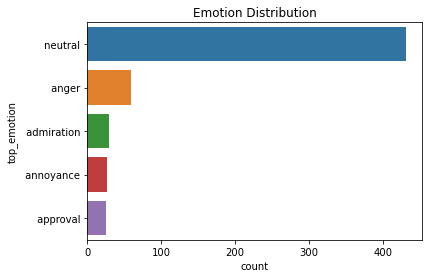

In [3]:
#Display bar chart
sns.countplot(data = database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index).set_title("Emotion Distribution")

In [4]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('corona_lockdown_comments.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

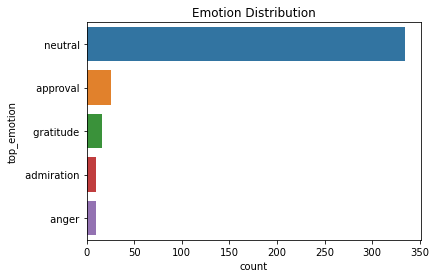

In [6]:
#Display bar chart
sns.countplot(data = database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index).set_title("Emotion Distribution")

In [7]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

database = pd.read_csv('covid19_lockdown_comments.csv')

[nltk_data] Downloading package stopwords to C:\Users\Chung
[nltk_data]     KY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

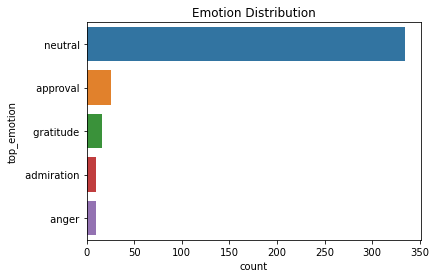

In [9]:
#Display bar chart
sns.countplot(data = database, y = 'top_emotion', order=database['top_emotion'].value_counts().iloc[:5].index).set_title("Emotion Distribution")